## Load dataset

In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [410]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Investigate the dataset

In [411]:
df.drop('id',axis = 1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [412]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Some varialbes are wrongly labeled as numeric.

- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- stroke: 1 if the patient had a stroke or 0 if not

In [413]:
for col in ['hypertension', 'heart_disease', 'stroke']:
    df[col] = df[col].apply(lambda x: {0:'No', 1:'Yes'}[x])

In [414]:
#investigate gender column
print(df["gender"].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [415]:
#investigate the specific row with no gender
df[df["gender"] == "Other"]

#is part of the non_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,No,No,No,Private,Rural,143.33,22.4,formerly smoked,No


In [416]:
df = df.drop(df[df["gender"] == "Other"].index)
print(df["gender"].value_counts())

Female    2994
Male      2115
Name: gender, dtype: int64


In [417]:
#investigate ever_married
print(df["ever_married"].value_counts())

Yes    3353
No     1756
Name: ever_married, dtype: int64


In [418]:
#investigate work type
print(df["work_type"].value_counts())

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [419]:
#investigate residence type
print(df["Residence_type"].value_counts())

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


In [420]:
#investigate smoking status
print(df["smoking_status"].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


## Visualisations

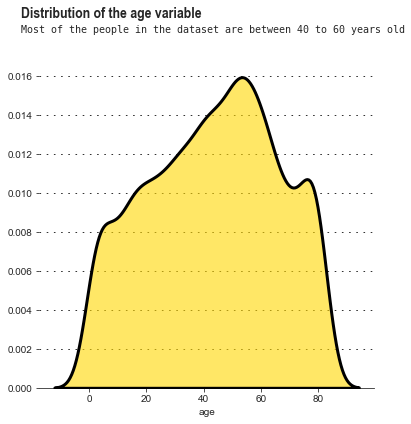

In [421]:
#Distribution of age variable
f, ax = plt.subplots(figsize=(6,6))

#text
ax.text(-24,0.019,'Distribution of the age variable',fontsize=15,fontweight='bold', fontfamily='Arial Narrow')
ax.text(-24,0.01826,'Most of the people in the dataset are between 40 to 60 years old',fontsize=10,fontweight='light', fontfamily='monospace')

#plot and configurations
sns.kdeplot(x= df["age"], shade=True, color="gold", alpha= 0.6, zorder= 3, linewidth= 3, edgecolor= "black")
ax.set_ylabel("")
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
ax.spines[["top", "right", "left"]].set_visible(False)


# most of the people in the df are between 40 to 60 years old

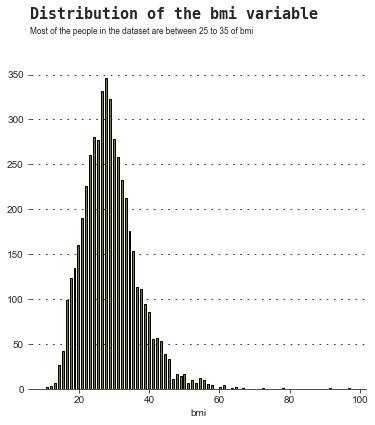

In [422]:
#Distribution of age variable
f, ax = plt.subplots(figsize=(6,6))

#text
ax.text(6, 412,'Distribution of the bmi variable',fontsize=15,fontweight='bold', fontfamily='monospace')
ax.text(6, 395,'Most of the people in the dataset are between 25 to 35 of bmi',fontsize=10,fontweight='light', fontfamily='Arial Narrow')


#Distribution of age variable
sns.histplot(x= df["bmi"], color='olive', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.5)
ax.set_ylabel("")
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
ax.spines[["top", "right", "left"]].set_visible(False)


Distribution is right skewed
most of the people in the dataset are between 25 to 35 of bmi

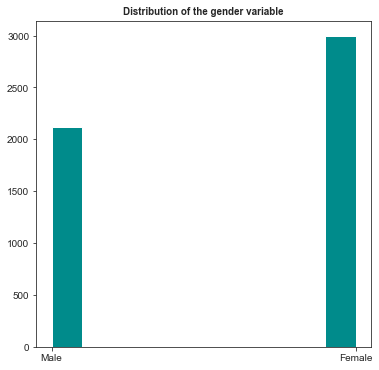

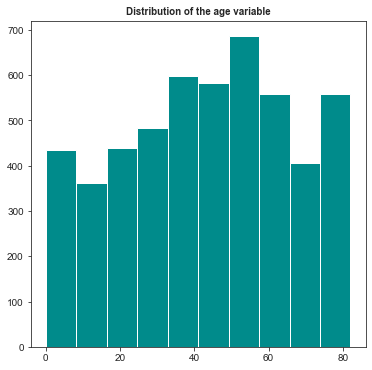

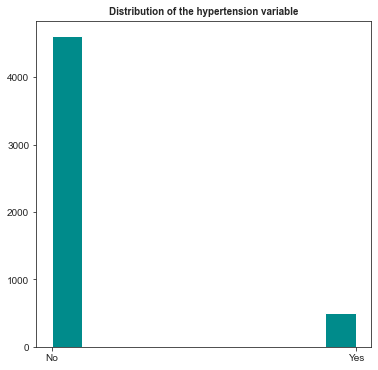

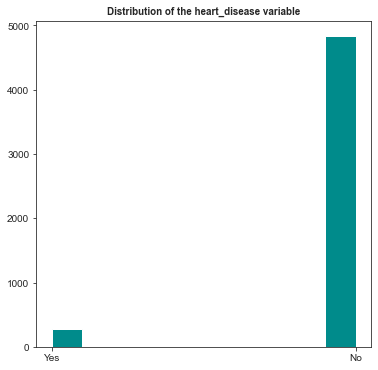

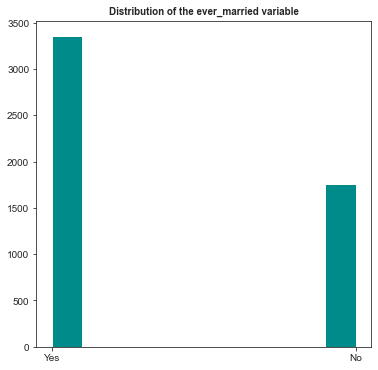

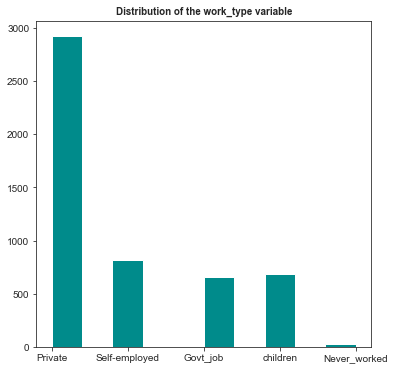

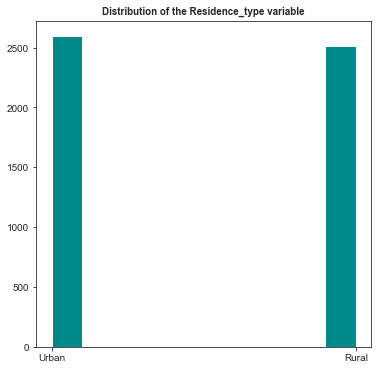

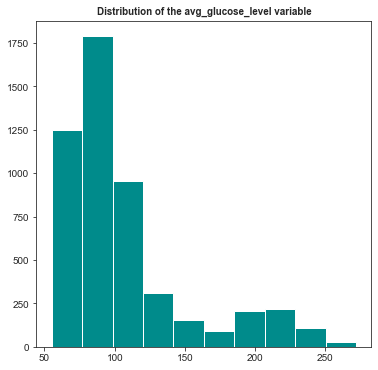

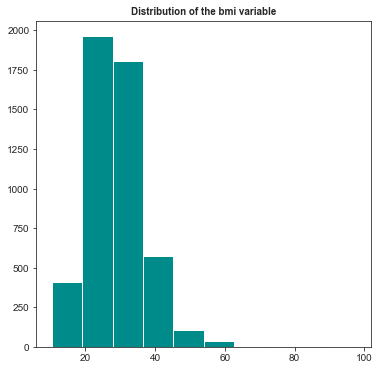

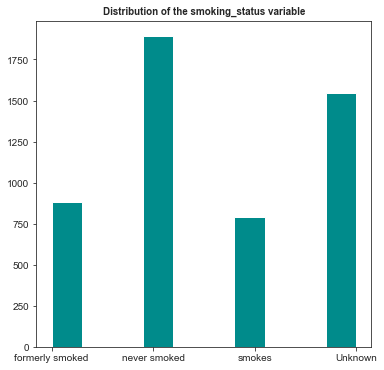

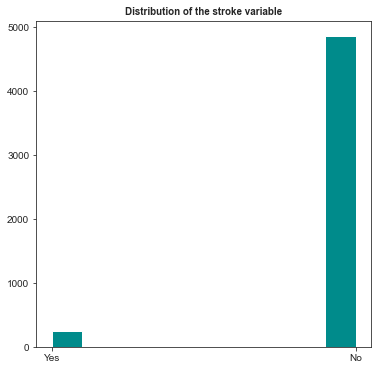

In [423]:
for i in df.columns:

    plt.rcParams["figure.figsize"] = (6,6)
#text
    plt.title('Distribution of the {} variable'.format(i) ,fontsize=12,fontweight='bold', fontfamily='Arial Narrow')
#Distribution of age variable
    plt.hist(x= df[i], alpha=1, color="darkcyan")
    plt.show()


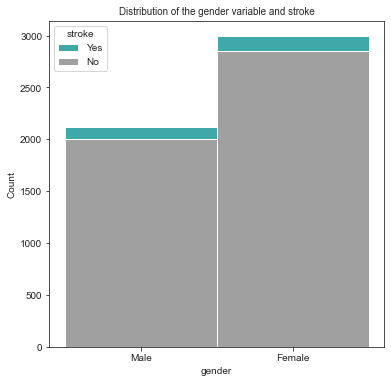

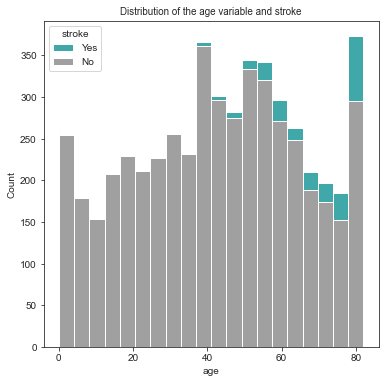

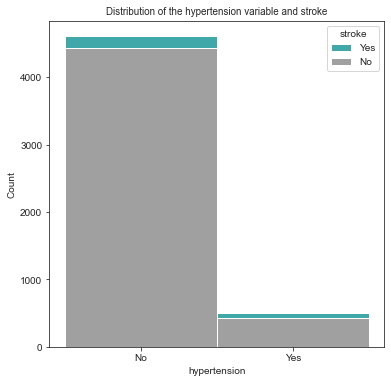

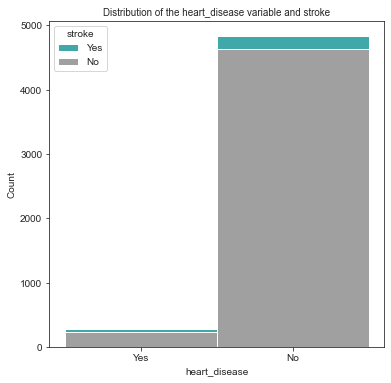

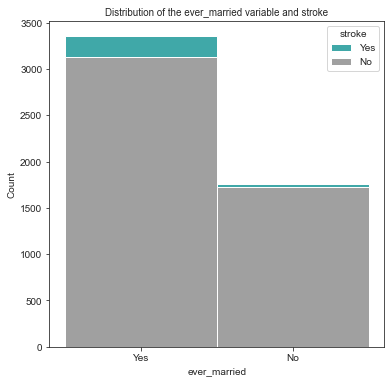

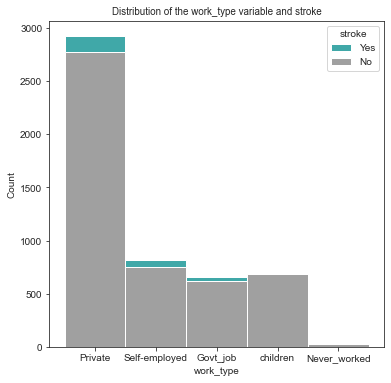

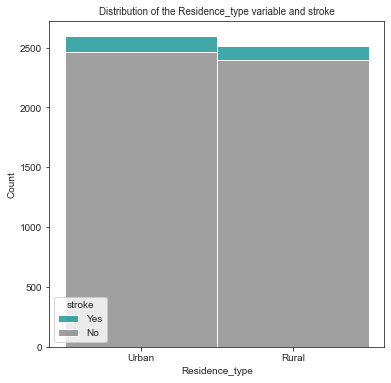

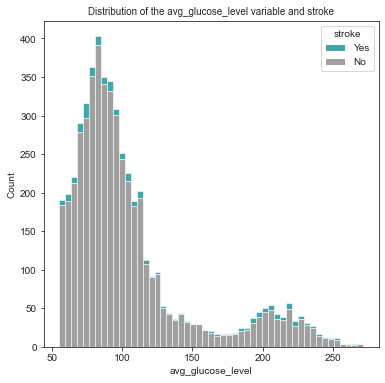

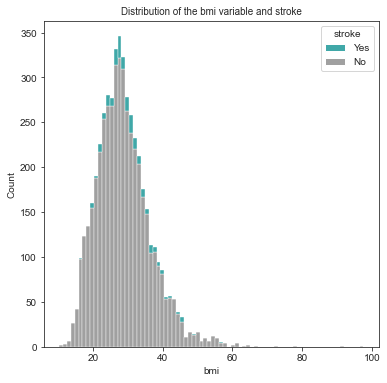

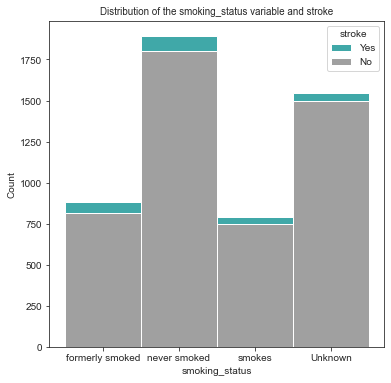

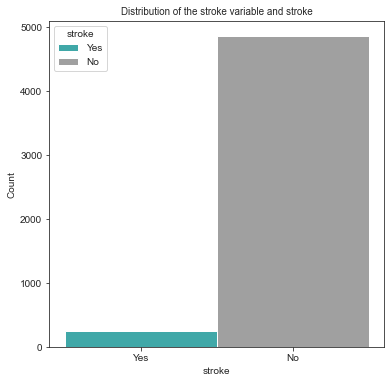

In [424]:
palette2=["darkcyan","grey"]

for i in df.columns:
    plt.rcParams["figure.figsize"] = (6,6)
    plt.title("Distribution of the {} variable and stroke".format(i), fontfamily='Arial Narrow')
    sns.histplot(data= df, x=i, hue= "stroke", stat= "count", palette=palette2, multiple="stack")
    plt.show()


## Data Transformation

In [425]:
#change to category type
categories = ["gender", "smoking_status", "Residence_type", "work_type"]

for col in categories:
    df[col] = df[col].astype("category")

#### Label Encoder for values yes/no

In [426]:
#change yes/no to numbers
from sklearn.preprocessing import LabelEncoder

#create encoder
enconder = LabelEncoder()

columns =  "gender", "hypertension", "heart_disease", "ever_married", "Residence_type", "stroke"

#create new variable with assigned numbers
for col in columns:
    df[col] = enconder.fit_transform(df[col])


#check data again
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


#### One-hot for values with more than 1 category

In [427]:
columns = ['work_type', 'smoking_status']

df = pd.get_dummies(df, columns= columns, prefix = columns)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


##### BMI

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

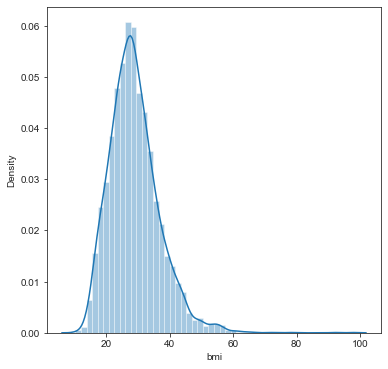

In [428]:
sns.distplot(df.bmi)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Bmi median-transformed'}, xlabel='bmi', ylabel='Density'>

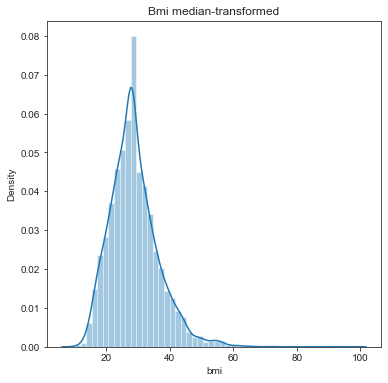

In [429]:
#transform bmi values to log values

df["bmi"] = df["bmi"].fillna(df["bmi"].median())

plt.title("Bmi median-transformed")
sns.distplot(df.bmi)

#### Min-Max normalization

In [430]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    df[col] = df[col]/df[col].max()

In [431]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.817073,0,1,1,1,0.841577,0.375000,1,0,0,1,0,0,0,1,0,0
1,0,0.743902,0,0,1,0,0.744130,0.287910,1,0,0,0,1,0,0,0,1,0
2,1,0.975610,0,1,1,0,0.389784,0.332992,1,0,0,1,0,0,0,0,1,0
3,0,0.597561,0,0,1,1,0.630124,0.352459,1,0,0,1,0,0,0,0,0,1
4,0,0.963415,1,0,1,0,0.640760,0.245902,1,0,0,0,1,0,0,0,1,0


## Feature Selection

### Correlation 

In [433]:
X = df.drop(columns=["stroke"])

<AxesSubplot:>

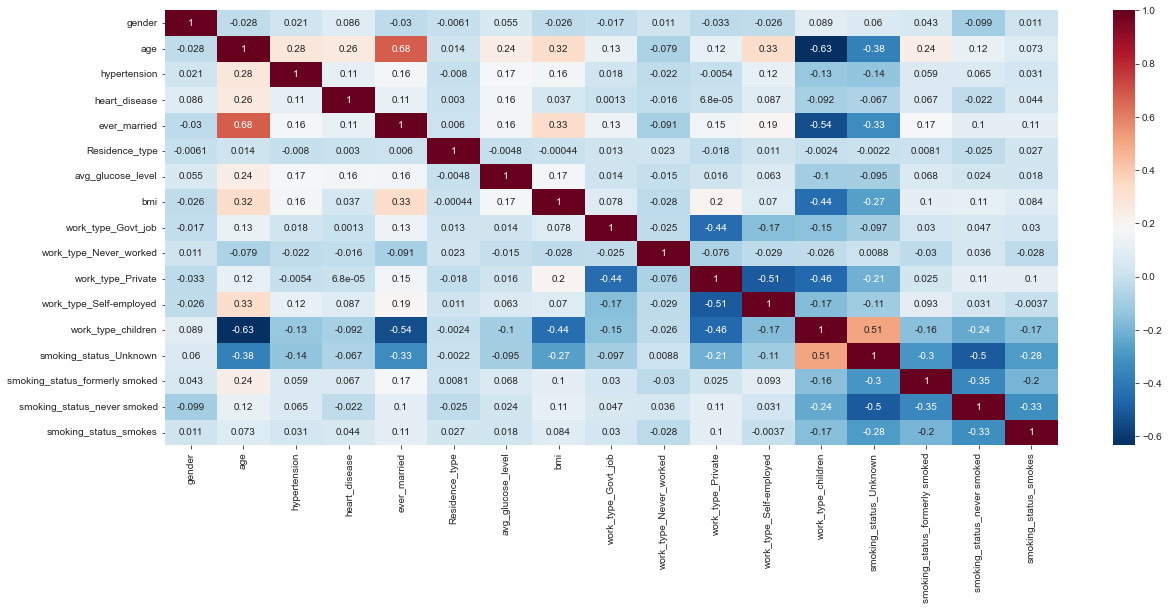

In [438]:
plt.rcParams["figure.figsize"] = (20,8)

#pearson is default
corr_matrix = X.corr()
sns.heatmap(corr_matrix,annot = True, cmap = "RdBu_r")

In [439]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) >0.5:
            print(corr_matrix.columns[i],
            corr_matrix.columns[j], corr_matrix.iloc[i,j])


ever_married age 0.6790844068666172
work_type_Self-employed work_type_Private -0.5054477507613803
work_type_children age -0.6343196781163086
work_type_children ever_married -0.5446575401822961
smoking_status_Unknown work_type_children 0.5127214319524146
smoking_status_never smoked smoking_status_Unknown -0.504694900380752


## Split data

[[1.         0.81707317 0.         ... 1.         0.         0.        ]
 [0.         0.74390244 0.         ... 0.         1.         0.        ]
 [1.         0.97560976 0.         ... 0.         1.         0.        ]
 ...
 [0.         0.42682927 0.         ... 0.         1.         0.        ]
 [1.         0.62195122 0.         ... 1.         0.         0.        ]
 [0.         0.53658537 0.         ... 0.         0.         0.        ]]


[0.         0.03652899 0.00084642 0.01346102 0.00257421 0.
 0.00706858 0.00896317 0.         0.         0.         0.
 0.00598968 0.00902789 0.         0.00378447 0.        ]
